<a href="https://colab.research.google.com/github/KUMARPALAKOLLU/socialNetworkAnalysis/blob/main/CommunityDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 2**

**P V S N S GANESH KUMAR**

**22MCB0036**

**Community Detection in an Email Network:**

The network was generated using email data from a large European research institution. it has anonymized information about all incoming and outgoing email between members of the research institution. There is an edge (u, v) in the network if person u sent person v at least one email. The e-mails only represent communication between institution members (the core), and the dataset does not contain incoming messages from or outgoing messages to the rest of the world.

**Dataset link:** http://snap.stanford.edu/data/email-Eu-core.html

In [ ]:
!pip install networkx
import pandas as pd
import numpy as np  
import networkx as nx
import random
from matplotlib import pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Number of nodes taken:  1005
Number of edges taken:  1005


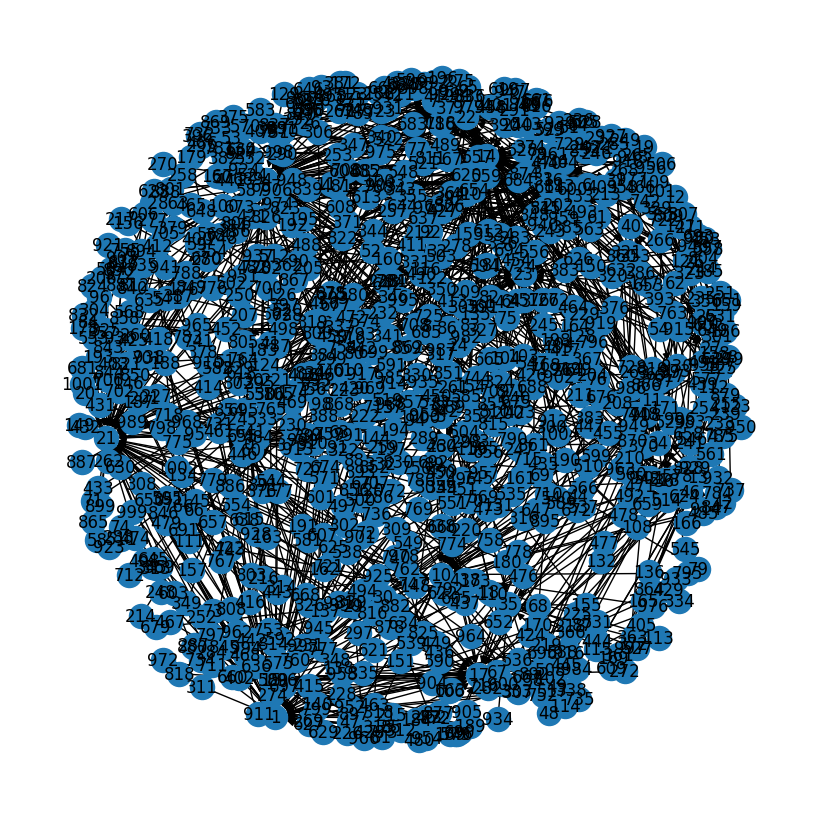

In [ ]:
# Loading the data into graph using Networkx
G = nx.read_edgelist('/content/drive/MyDrive/Colab Notebooks/email-Eu-core-department-labels.txt', create_using=nx.DiGraph())

# if we want to drop some nodes 
# drop_count = 200  # Number of nodes to drop
# nodes_to_drop = list(G.nodes)[:drop_count]  # Get the first `drop_count` nodes
# G.remove_nodes_from(nodes_to_drop)

print('Number of nodes taken: ', len(G.nodes))
print('Number of edges taken: ', len(G.edges))

pos=nx.spring_layout(G,k=0.3, iterations=50) #Getting Positions to plot the graph
nx.draw(G,pos,with_labels=True)
nx.draw_networkx_edge_labels(G, pos,edge_labels=nx.get_edge_attributes(G, 'weight'),font_color='red')
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

In [ ]:
# Calculate basic statistics
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

undirected = G.to_undirected()
# Calculate statistics for the largest weakly connected component (WCC)
largest_wcc = max(nx.weakly_connected_components(G), key=len)
wcc_num_nodes = len(largest_wcc)
wcc_num_edges = G.subgraph(largest_wcc).number_of_edges()

# Calculate statistics for the largest strongly connected component (SCC)
largest_scc = max(nx.strongly_connected_components(G), key=len)
scc_num_nodes = len(largest_scc)
scc_num_edges = G.subgraph(largest_scc).number_of_edges()

# Calculate average clustering coefficient
avg_clustering_coeff = nx.average_clustering(undirected)

# Calculate the number of triangles and fraction of closed triangles
num_triangles = sum(nx.triangles(undirected).values()) // 3
frac_closed_triangles = nx.transitivity(undirected)
# Calculate the diameter and 90-percentile effective diameter for the largest connected component
cc_diameter = nx.diameter(G.subgraph(largest_scc))
cc_eff_diameter = np.percentile(list(nx.effective_size(G.subgraph(largest_scc)).values()), 90)


# Print the computed statistics
print("Dataset Statistics:")
print(f"Nodes: {num_nodes}")
print(f"Edges: {num_edges}")
print(f"Nodes in largest WCC: {wcc_num_nodes} ({wcc_num_nodes/num_nodes:.3f})")
print(f"Edges in largest WCC: {wcc_num_edges} ({wcc_num_edges/num_edges:.3f})")
print(f"Nodes in largest SCC: {scc_num_nodes} ({scc_num_nodes/num_nodes:.3f})")
print(f"Edges in largest SCC: {scc_num_edges} ({scc_num_edges/num_edges:.3f})")
print(f"Average clustering coefficient: {avg_clustering_coeff:.4f}")
print(f"Number of triangles: {num_triangles}")
print(f"Fraction of closed triangles: {frac_closed_triangles:.4f}")
print(f"Diameter of largest CC: {cc_diameter}")
print(f"90-percentile effective diameter of largest CC: {cc_eff_diameter:.1f}")


Dataset Statistics:
Nodes: 1005
Edges: 1005
Nodes in largest WCC: 800 (0.796)
Edges in largest WCC: 800 (0.796)
Nodes in largest SCC: 4 (0.004)
Edges in largest SCC: 4 (0.004)
Average clustering coefficient: 0.0000
Number of triangles: 0
Fraction of closed triangles: 0.0000
Diameter of largest CC: 3
90-percentile effective diameter of largest CC: 2.0


In [ ]:
!pip install python-louvain
!pip install community
!pip install modularity

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for modularity: filename=modularity-0.0.3-py3-none-any.whl size=1730 sha256=87f2e81232876dae81981b87a9cf3576b4bef1402318bacc9457d72e76618a67
  Stored in directory: /root/.cache/pip/wheels/ef/5e/bc/1b016c15de0e190f21f825d899690c58cb2b5ddfd9d5d5eea7
Successfully built modularity


In [ ]:
# Function to print Commmunity graph with customized features

def printCommunity(G,communities):
  # Function to generate a new color
  def get_color():
    r = lambda: random.randint(0,255)
    return '#%02X%02X%02X' % (r(),r(),r())
  # Add a 'community' attribute to each node
  for i, community in enumerate(communities):
    for node in community:
      G.nodes[node]["community"] = i

  # Generate colors
  color_map = [get_color() for _ in range(len(communities))]

  # Draw the graph
  plt.figure(figsize=(10, 10))
  nx.draw(
  G,
  with_labels=False,
  node_color=[color_map[G.nodes[node]["community"]] for node in G],
  )
  plt.show()

In [ ]:
# Evaluation Metrics 
import modularity
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
modularity_scores = {}
coverage_scores = {}

def coverage(G, communities):
    num_nodes_in_communities = sum(len(community) for community in communities)
    total_num_nodes = G.number_of_nodes()
    return num_nodes_in_communities / total_num_nodes


# **Louvain Community Detection**

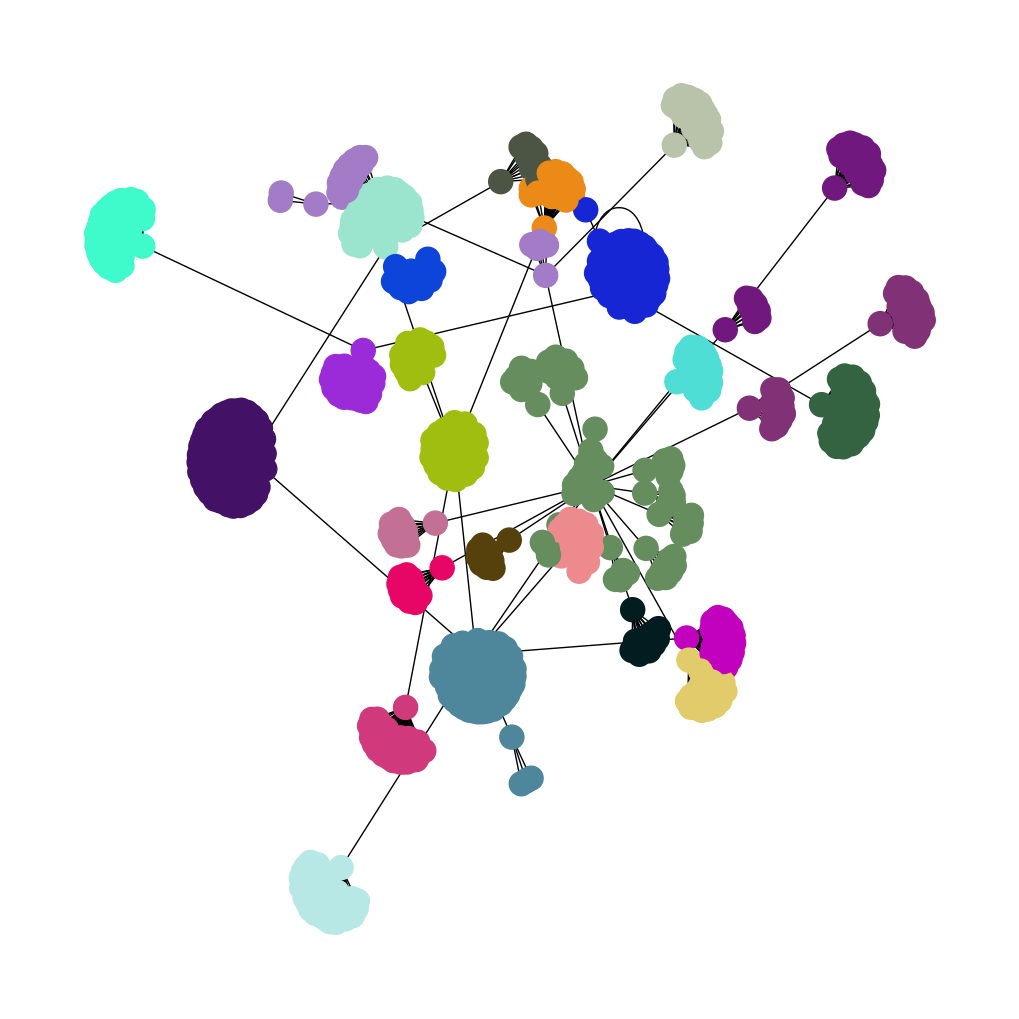

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from community import community_louvain
from networkx.algorithms.community.quality import modularity

G=G.to_undirected()
# Compute the communities using Louvain algorithm
partition = community_louvain.best_partition(G)

# Convert the partition dictionary to a list of sets
communities = []
for community_id in set(partition.values()):
    nodes = [node for node, com in partition.items() if com == community_id]
    communities.append(set(nodes))

# Visualize the communities
printCommunity(G,communities)

# Calculate the metrics
modularity_scores['Louvain'] = modularity(G, communities)
coverage_scores['Louvain'] = coverage(G, communities)

# **Label Propagation Algorithm (LPA)**

Number of communities: 40
Community 1 size: 50
Community 2 size: 62
Community 3 size: 70
Community 4 size: 13
Community 5 size: 109
Community 6 size: 18
Community 7 size: 5
Community 8 size: 29
Community 9 size: 52
Community 10 size: 87
Community 11 size: 20
Community 12 size: 29
Community 13 size: 40
Community 14 size: 16
Community 15 size: 4
Community 16 size: 27
Community 17 size: 9
Community 18 size: 56
Community 19 size: 35
Community 20 size: 26
Community 21 size: 13
Community 22 size: 2
Community 23 size: 30
Community 24 size: 15
Community 25 size: 26
Community 26 size: 28
Community 27 size: 7
Community 28 size: 11
Community 29 size: 9
Community 30 size: 6
Community 31 size: 5
Community 32 size: 9
Community 33 size: 10
Community 34 size: 2
Community 35 size: 14
Community 36 size: 23
Community 37 size: 16
Community 38 size: 14
Community 39 size: 5
Community 40 size: 3


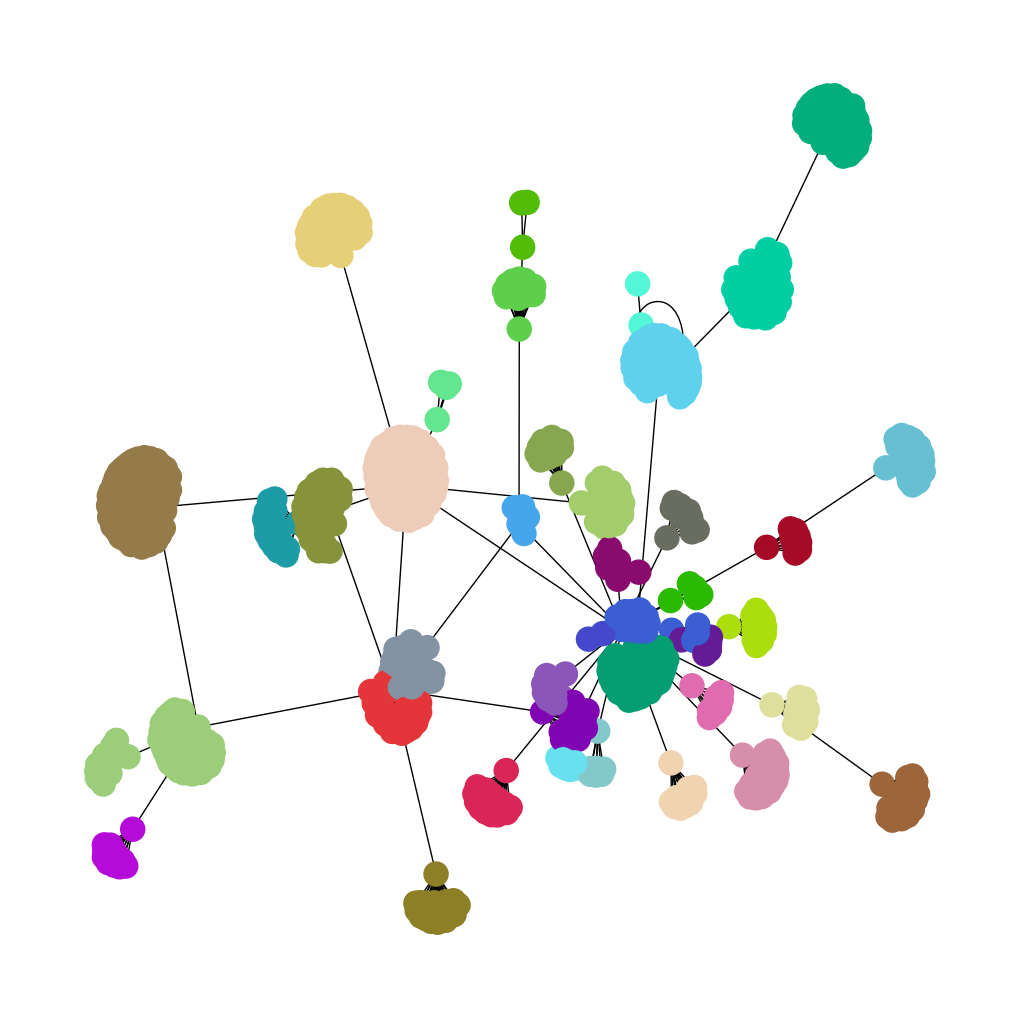

In [ ]:
import random
# Label Propagation
communities = nx.algorithms.community.label_propagation.asyn_lpa_communities(G)

# Convert communities generator to list of communities
communities = list(communities)
# Print number of communities and their sizes
print(f"Number of communities: {len(communities)}")

for i, community in enumerate(communities):
  print(f"Community {i+1} size: {len(community)}")

printCommunity(G,communities)

# Calculate the metrics
modularity_scores['LPA'] = modularity(G, communities)
coverage_scores['LPA'] = coverage(G, communities)

# **Fast Greedy Algorithm**

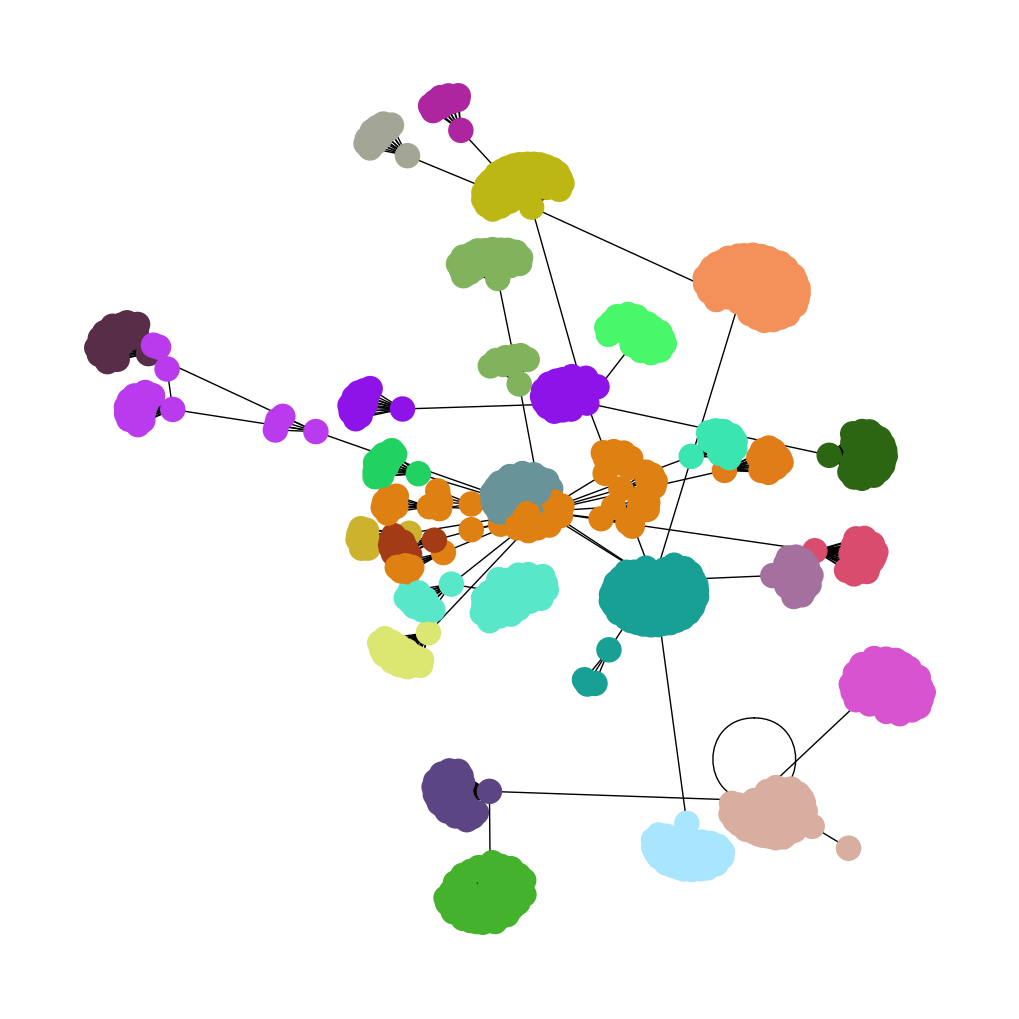

In [ ]:
from networkx.algorithms.community import greedy_modularity_communities

# Perform community detection using Newman-Girvan algorithm
communities = list(greedy_modularity_communities(G))

printCommunity(G,communities)

# Calculate the metrics
modularity_scores['Greedy'] = modularity(G, communities)
coverage_scores['Greedy'] = coverage(G, communities)

# **Girvan-Newman algorithm**

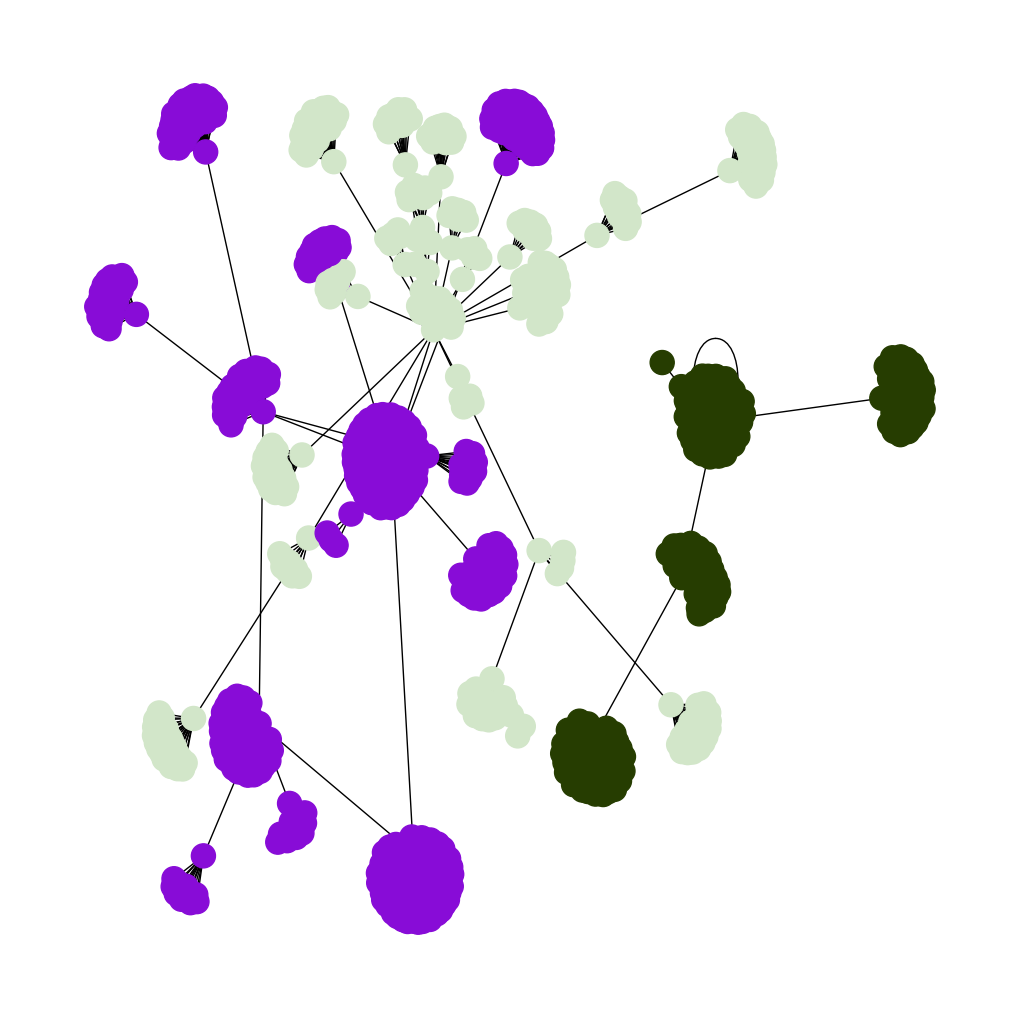

In [ ]:
from networkx.algorithms.community import girvan_newman
from sklearn.metrics import normalized_mutual_info_score

# Perform community detection using Girvan-Newman algorithm
comp = girvan_newman(G)

# Get the first set of communities
communities = tuple(sorted(c) for c in next(comp))
printCommunity(G, communities)

# Flatten the community assignments into a 1D array
labels_true = [i for c in communities for i in c]

# Compute the community assignments for each node
labels_pred = [0] * len(G)
for i, community in enumerate(communities):
    for node in community:
        labels_pred[int(node)] = i  # Convert node label to integer

# Calculate the metrics
modularity_scores['Girvan-Newman'] = modularity(G, communities)
coverage_scores['Girvan-Newman'] = coverage(G, communities)

# **Evaluations Metrics**

In [ ]:
print("Modularity Scores:")
for algorithm, score in modularity_scores.items():
    print(f"{algorithm}: {score}")

print("\n\nCoverage Scores:")
for algorithm, score in coverage_scores.items():
    print(f"{algorithm}: {score}")

Modularity Scores:
Louvain: 0.9204925620652955
LPA: 0.9129254226380537
Greedy: 0.9208178015395658
Girvan-Newman: 0.6225137991633869


Coverage Scores:
Louvain: 1.0
LPA: 1.0
Greedy: 1.0
Girvan-Newman: 1.0


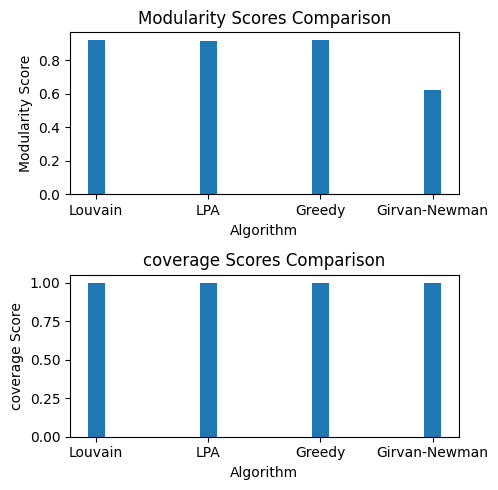

In [ ]:
# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(5, 5))

# Plot Modularity Scores
axs[0].bar(modularity_scores.keys(), modularity_scores.values(),width =0.15)
axs[0].set_xlabel("Algorithm")
axs[0].set_ylabel("Modularity Score")
axs[0].set_title("Modularity Scores Comparison")

# Plot coverage Scores
axs[1].bar(coverage_scores.keys(), coverage_scores.values(),width =0.15)
axs[1].set_xlabel("Algorithm")
axs[1].set_ylabel("coverage Score")
axs[1].set_title("coverage Scores Comparison")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()
